In [ ]:
!wget -P ../inaturalist_data/ https://storage.googleapis.com/wandb_datasets/nature_12K.zip

--2025-04-14 11:17:07--  https://storage.googleapis.com/wandb_datasets/nature_12K.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.195.155, 142.250.207.91, 142.250.182.123, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.195.155|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3816687935 (3.6G) [application/zip]
Saving to: ‘nature_12K.zip’

nature_12K.zip      100%[===================>]   3.55G  10.8MB/s    in 5m 36s  

2025-04-14 11:22:43 (10.8 MB/s) - ‘nature_12K.zip’ saved [3816687935/3816687935]



In [7]:
import zipfile

def print_zip_structure(zip_file_path):
    """
    Prints the directory structure of a ZIP file, including all directories and subdirectories.
    Prints only the first 5 files, but all directories.
    
    Args:
        zip_file_path (str): Path to the ZIP file.
    """
    try:
        with zipfile.ZipFile(zip_file_path, 'r') as zip_file:
            file_count = 0  # Counter for files
            for item in zip_file.namelist():
                # Check if the item is a directory
                if item.endswith('/'):
                    file_count = 0  # Reset file count for each directory
                    print(f"Directory: {item}")
                else:
                    # Print only the first 5 files
                    if file_count < 5:
                        print(f"File: {item}")
                        file_count += 1
    except zipfile.BadZipFile:
        print("Error: The file is not a valid ZIP archive.")

# Example usage
print_zip_structure("../inaturalist_data/nature_12K.zip")

Directory: inaturalist_12K/
File: inaturalist_12K/.DS_Store
Directory: inaturalist_12K/train/
Directory: inaturalist_12K/train/Plantae/
File: inaturalist_12K/train/Plantae/1dfc3916ad58af6ce9af9fc8b36ceedd.jpg
File: inaturalist_12K/train/Plantae/e49eeff2b27ae74351fdf8ffa3791307.jpg
File: inaturalist_12K/train/Plantae/519ae1c558dff337bb4084934e31a4a8.jpg
File: inaturalist_12K/train/Plantae/2232663628cd9c456a6d01c90ba961c4.jpg
File: inaturalist_12K/train/Plantae/e26227424586b97ab3377a567ac4f006.jpg
Directory: inaturalist_12K/train/Aves/
File: inaturalist_12K/train/Aves/d55072249be7621868a3e62cae31ac29.jpg
File: inaturalist_12K/train/Aves/e53ee219fded8973f5295c2c628b3391.jpg
File: inaturalist_12K/train/Aves/2d0243d0dc0c6132b4d982c6617fed69.jpg
File: inaturalist_12K/train/Aves/4fe826e09bc9e1de1d5ced2e12c9e3b8.jpg
File: inaturalist_12K/train/Aves/b92c670548d19740c14a9add63a4277b.jpg
Directory: inaturalist_12K/train/Amphibia/
File: inaturalist_12K/train/Amphibia/3a7954b5e4efa5ef52aeba3d792adc

In [2]:
# Set the project root directory
import os
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Q1 - Solution

In [6]:
import torch
import torch.nn as nn

class MyCNN(nn.Module):
    """
    A modular CNN architecture:
      - 5 x (Conv -> Activation -> MaxPool)
      - 1 Dense (fully connected) layer of n neurons
      - 1 Output layer of 10 neurons

    Accepts images of size (3 x H x W).
    After 5 max-pool operations (each halves H and W),
    final feature map size is (m x (H/32) x (W/32)) if H and W are multiples of 32.
    """


    def __init__(self,
                 in_channels=3,
                 num_filters=16,     # m
                 kernel_size=3,      # k
                 activation_fn=nn.ReLU,
                 dense_neurons=128,  # n
                 image_height=224,   # default
                 image_width=224     # default
                 ):
        """
        :param in_channels:   Number of input channels (3 for RGB images)
        :param num_filters:   m = number of filters in each Conv layer
        :param kernel_size:   k = kernel size of each Conv filter (k x k)
        :param activation_fn: Pytorch activation class, e.g., nn.ReLU
        :param dense_neurons: n = number of neurons in the fully connected layer
        :param image_height:  The height of the input image (assumed multiple of 32)
        :param image_width:   The width of the input image (assumed multiple of 32)
        """
        super(MyCNN, self).__init__()

        # We assume 'same' padding, i.e., output of conv has same spatial size
        # Then each MaxPool(2x2) halves the H and W each time.
        padding = kernel_size // 2
        Act = activation_fn  # for readability

        #-------------------------
        # 1) Block 1
        #   Conv(in_channels->m), Act, MaxPool(2x2)
        #-------------------------
        self.conv1 = nn.Conv2d(
            in_channels=in_channels,
            out_channels=num_filters,
            kernel_size=kernel_size,
            stride=1,
            padding=padding
        )
        self.act1 = Act()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        #-------------------------
        # 2) Block 2
        #   Conv(m->m), Act, MaxPool(2x2)
        #-------------------------
        self.conv2 = nn.Conv2d(
            in_channels=num_filters,
            out_channels=num_filters,
            kernel_size=kernel_size,
            stride=1,
            padding=padding
        )
        self.act2 = Act()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        #-------------------------
        # 3) Block 3
        #   Conv(m->m), Act, MaxPool(2x2)
        #-------------------------
        self.conv3 = nn.Conv2d(
            in_channels=num_filters,
            out_channels=num_filters,
            kernel_size=kernel_size,
            stride=1,
            padding=padding
        )
        self.act3 = Act()
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)

        #-------------------------
        # 4) Block 4
        #   Conv(m->m), Act, MaxPool(2x2)
        #-------------------------
        self.conv4 = nn.Conv2d(
            in_channels=num_filters,
            out_channels=num_filters,
            kernel_size=kernel_size,
            stride=1,
            padding=padding
        )
        self.act4 = Act()
        self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2)

        #-------------------------
        # 5) Block 5
        #   Conv(m->m), Act, MaxPool(2x2)
        #-------------------------
        self.conv5 = nn.Conv2d(
            in_channels=num_filters,
            out_channels=num_filters,
            kernel_size=kernel_size,
            stride=1,
            padding=padding
        )
        self.act5 = Act()
        self.pool5 = nn.MaxPool2d(kernel_size=2, stride=2)

        #--------------------------------------
        # Compute final feature map dimension.
        # Each pool halves H and W => H/32, W/32
        #--------------------------------------
        reduced_height = image_height // 32
        reduced_width  = image_width // 32
        self.flatten_dim = num_filters * reduced_height * reduced_width

        # Dense layer
        self.fc1 = nn.Linear(self.flatten_dim, dense_neurons)
        self.act_fc1 = Act()

        # Output layer: 10 neurons
        self.output = nn.Linear(dense_neurons, 10)

    def forward(self, x):
        # x: (batch_size, 3, H, W)

        # Block 1
        x = self.conv1(x)    # (batch_size, m, H, W)
        x = self.act1(x)     # (batch_size, m, H, W)
        x = self.pool1(x)    # (batch_size, m, H/2, W/2)

        # Block 2
        x = self.conv2(x)    # (batch_size, m, H/2, W/2)
        x = self.act2(x)     # (batch_size, m, H/2, W/2)
        x = self.pool2(x)    # (batch_size, m, H/4, W/4)

        # Block 3
        x = self.conv3(x)    # (batch_size, m, H/4, W/4)
        x = self.act3(x)     # (batch_size, m, H/4, W/4)
        x = self.pool3(x)    # (batch_size, m, H/8, W/8)

        # Block 4
        x = self.conv4(x)    # (batch_size, m, H/8, W/8)
        x = self.act4(x)     # (batch_size, m, H/8, W/8)
        x = self.pool4(x)    # (batch_size, m, H/16, W/16)

        # Block 5
        x = self.conv5(x)    # (batch_size, m, H/16, W/16)
        x = self.act5(x)     # (batch_size, m, H/16, W/16)
        x = self.pool5(x)    # (batch_size, m, H/32, W/32)

        # Flatten
        x = x.view(x.size(0), -1)  # (batch_size, m * (H/32) * (W/32))

        # Dense
        x = self.fc1(x)            # (batch_size, dense_neurons)
        x = self.act_fc1(x)        # (batch_size, dense_neurons)

        # Output: 10 classes
        x = self.output(x)         # (batch_size, 10)

        return x

In [7]:
import os
import zipfile
from PIL import Image
import torch
import torchvision.transforms as T

def extract_data_if_needed(zip_path, extract_dir):
    """
    Extracts the zip file into 'extract_dir' if that folder does not exist.
    """
    if not os.path.exists(extract_dir):
        os.makedirs(extract_dir, exist_ok=True)
        print(f"Extracting {zip_path} to {extract_dir} ...")

        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(path=extract_dir)

        print("Extraction done.")
    else:
        print(f"Directory {extract_dir} already exists. Skipping extraction.")

def load_single_image(image_path, resize=True, resize_dim=(224, 224)):
    """
    Loads a single image with PIL, applies transforms, and returns the tensor.
    Also prints shape info for clarity.
    :param image_path: Path to a single .jpg file
    :return: A PyTorch tensor of shape (1, 3, 224, 224)
    """
    # Only convert to Tensor; no resizing to 224x224
    transform = T.Compose([
        T.ToTensor()  # # from [0..255] PIL image to [0..1] float tensor, shape => (C, H, W), range [0,1]
    ])

    # If resize is True, add resizing to the transform
    if resize:
        print("Resizing image to resize_dim[0] x resize_dim[1] ...")
        # Basic transform: resize to resize_dim[0] x resize_dim[1], then convert to tensor
        transform = T.Compose([
            T.Resize(resize_dim),  # (H, W)
            T.ToTensor()           # from [0..255] PIL image to [0..1] float tensor, shape (C,H,W)
        ])

    # Load the image
    pil_img = Image.open(image_path).convert('RGB')
    print(f"Original image size: {pil_img.size} (Width x Height)")

    # Apply transforms
    img_tensor = transform(pil_img)  # shape: (3, H, W)
    print(f"Transformed image shape: {img_tensor.shape} (C, H, W)")

    # Add a batch dimension => (1, 3, H, W) i.e. (batch_size, C, H, W)
    img_tensor = img_tensor.unsqueeze(0)
    print(f"Final input shape to the model: {img_tensor.shape} (Batch, C, H, W)\n")

    return img_tensor

def test_model_with_image(model, image_tensor):
    """
    Passes a single image tensor through the model and prints output shape.
    :param model: Instance of MyCNN
    :param image_tensor: shape (1, 3, H, W)
    """
    with torch.no_grad():
        output = model(image_tensor)
    print(f"Model output shape: {output.shape} (Batch, 10)")
    print("Raw output logits:", output)

def main():
    # Paths (adjust if necessary)
    DATA_ZIP_PATH = "../inaturalist_data/nature_12K.zip"
    EXTRACT_DIR   = "../inaturalist_data/nature_12K_extracted"
    
    # 1) Optional: Extract ZIP if needed
    extract_data_if_needed(DATA_ZIP_PATH, EXTRACT_DIR)

    # ------------------------------------------------------------------
    # The ZIP has top-level folder 'inaturalist_12K' inside it.
    # After extraction, we get:
    #   ../inaturalist_data/inaturalist_12K_extracted/
    #       inaturalist_12K/
    #           train/
    #           val/
    #           ...
    #
    # So the image path must include "inaturalist_12K".
    # ------------------------------------------------------------------

    # 2) Pick a single image path from the extracted data
    #    For example, one file from 'train/Plantae' 
    sample_image_path = os.path.join(
        EXTRACT_DIR,
        "inaturalist_12K",    # top-level folder from the zip
        "train",
        "Insecta",
        "0a4a6a25d2b409ed0755097ed21fdf5b.jpg"
    )
    if not os.path.isfile(sample_image_path):
        raise FileNotFoundError(f"Sample image not found at {sample_image_path}")

    # 3) Load and transform the image
    image_tensor = load_single_image(sample_image_path, resize=True, resize_dim=(32*15, 32*15))

    # Inspect the shape to pick your image_height, image_width
    # For example, if the printed shape is [3, 480, 640], do:
    _, c, h, w = image_tensor.shape


    # 4) Create model instance
    #    Example: 16 filters each conv, kernel_size=3, dense of 128
    model = MyCNN(in_channels=3,
                  num_filters=16,
                  kernel_size=3,
                  activation_fn=nn.ReLU,
                  dense_neurons=128,
                  image_height=h,
                  image_width=w)
    print(f"Model created with input shape: (3, {h}, {w})")

    # 5) Test forward pass
    test_model_with_image(model, image_tensor)

if __name__ == "__main__":
    main()


Directory ../inaturalist_data/nature_12K_extracted already exists. Skipping extraction.
Resizing image to resize_dim[0] x resize_dim[1] ...
Original image size: (800, 534) (Width x Height)
Transformed image shape: torch.Size([3, 480, 480]) (C, H, W)
Final input shape to the model: torch.Size([1, 3, 480, 480]) (Batch, C, H, W)

Model created with input shape: (3, 480, 480)
Model output shape: torch.Size([1, 10]) (Batch, 10)
Raw output logits: tensor([[-0.0165,  0.0039, -0.0568, -0.0755, -0.0305, -0.0331,  0.0169, -0.0038,
          0.0426, -0.0771]])


# Q2 - Solution

In [8]:
import os
import torch
import random
import numpy as np
import torch.nn as nn
import yaml
import torch


def set_seeds(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)

def get_activation_fn(activation_name):
    """
    Returns the activation function class based on the provided name.
    """
    act_fn = None
    if activation_name.lower() == "mish":
        act_fn = nn.Mish
    elif activation_name.lower() == "relu":
        act_fn = nn.ReLU
    elif activation_name.lower() == "gelu":
        act_fn = nn.GELU
    elif activation_name.lower() == "silu":
        act_fn = nn.SiLU
    else:
        act_fn = nn.ReLU
    return act_fn


def get_configs(project_root, config_filename):
    with open(os.path.join(project_root, "config", config_filename), 'r') as f:
        config = yaml.safe_load(f)
    return config

# Training loop
def train_one_epoch(model, dataloader, optimizer, criterion, device):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for images, labels in dataloader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    epoch_loss = running_loss / total
    epoch_acc = correct / total
    return epoch_loss, epoch_acc

def validate_one_epoch(model, dataloader, criterion, device):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            running_loss += loss.item() * images.size(0)
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    epoch_loss = running_loss / total
    epoch_acc = correct / total
    return epoch_loss, epoch_acc

import os
import sys
import torch
import torchvision
import torchvision.transforms as T
import numpy as np
from sklearn.model_selection import train_test_split

def load_inaturalist_train_val_data(data_dir,
                                    val_ratio=0.2,
                                    seed=42,
                                    augment=False,
                                    resize_dim=224):
    """
    Loads iNaturalist data from 'data_dir', does stratified train/val split.
    Optionally apply data augmentations or just a simple Resize+ToTensor.

    :param data_dir:      Path to the folder containing subfolders of images,
                          e.g. ".../inaturalist_12K_extracted/inaturalist_12K/train"
    :param val_ratio:     Fraction of data to reserve for validation (default 0.2)
    :param seed:          Random seed to ensure reproducible splits
    :param augment:       If True, apply creative data augmentations
    :param resize_dim:    The final resize dimension for height & width
                          (ideally a multiple of 32 for this CNN)
    :return:              (train_dataset, val_dataset, class_names)    
    """
    # Define Transformations
    # If you set augment=True, we'll apply some "creative" transformations.
    # Otherwise, we just do a simple resize + ToTensor().
    if augment:
        transform_list = [
            #  (A) Random resizing and cropping
            T.RandomResizedCrop(size=resize_dim),

            #  (B) Random flips
            T.RandomHorizontalFlip(p=0.5),

            #  (C) Some random rotation
            T.RandomRotation(degrees=30),

            #  (D) Color jitter (brightness/contrast/saturation/hue)
            T.ColorJitter(
                brightness=0.2,
                contrast=0.2,
                saturation=0.2,
                hue=0.1
            ),

            #  (E) Small chance to invert the colors
            T.RandomInvert(p=0.1),

            #  (F) Random perspective distortion
            T.RandomPerspective(distortion_scale=0.2, p=0.5),

            #  (G) Finally, convert to Tensor
            T.ToTensor(),

            #  (H) Optionally, random erase part of the image
            T.RandomErasing(p=0.1)
        ]
    else:
        # Minimal transform
        transform_list = [
            T.Resize((resize_dim, resize_dim)),
            T.ToTensor()
        ]

    transform = T.Compose(transform_list)

    # Full dataset
    full_dataset = torchvision.datasets.ImageFolder(root=data_dir,
                                                    transform=transform)
    class_names = full_dataset.classes
    labels = full_dataset.targets
    indices = list(range(len(full_dataset)))

    # Stratified split
    set_seeds(seed)
    train_indices, val_indices = train_test_split(indices,
                                                  test_size=val_ratio,
                                                  stratify=labels,
                                                  random_state=seed)
    train_dataset = torch.utils.data.Subset(full_dataset, train_indices)
    val_dataset = torch.utils.data.Subset(full_dataset, val_indices)
    return train_dataset, val_dataset, class_names


import torch
import torch.nn as nn
# Extended version of MyCNN with additional features
class MyCNNExtended(nn.Module):
    """
    Basic CNN with 5 conv->act->pool blocks, optional BN, dropout,
    flexible filter organization, etc.
    """

    def __init__(self,
                 in_channels=3,
                 num_filters=16,  # base number of filters
                 kernel_size=3,
                 activation_fn=nn.ReLU,
                 dense_neurons=128,
                 image_height=224,
                 image_width=224,
                 filter_organization="same",
                 batch_norm=False,
                 dropout_rate=0.0,
                 ):
        """
        :param filter_organization: "same", "double_each_layer", "halve_each_layer" etc.
        :param batch_norm: if True, add nn.BatchNorm2d after each conv
        :param dropout_rate: if > 0, we add nn.Dropout(...) in the final dense layers
        """
        super(MyCNNExtended, self).__init__()

        self.activation_class = activation_fn
        Act = activation_fn  # convenience
        padding = kernel_size // 2

        # Decide how many filters each conv layer has
        # Example logic:  "same" => all layers have the same # (num_filters).
        #                 "double_each_layer" => [m, 2m, 4m, 8m, 16m]
        #                 "halve_each_layer" => [m, m/2, m/4, m/8, m/16] etc
        filter_sizes = []
        if filter_organization == "same":
            filter_sizes = [num_filters] * 5
        elif filter_organization == "double_each_layer":
            filter_sizes = [num_filters * (2 ** i) for i in range(5)]
        elif filter_organization == "halve_each_layer":
            # ensure at least 1 filter
            filter_sizes = [max(1, num_filters // (2 ** i)) for i in range(5)]
        else:
            # fallback: same
            filter_sizes = [num_filters] * 5

        # Build convolutional layers
        conv_layers = []
        in_ch = in_channels
        for out_ch in filter_sizes:
            block = []
            block.append(nn.Conv2d(in_ch, out_ch, kernel_size=kernel_size, stride=1, padding=padding))
            if batch_norm:
                block.append(nn.BatchNorm2d(out_ch))
            block.append(Act())
            block.append(nn.MaxPool2d(kernel_size=2, stride=2))
            conv_layers.append(nn.Sequential(*block))
            in_ch = out_ch

        self.conv_layers = nn.Sequential(*conv_layers)

        # After 5 max pools => (height, width) / 32
        reduced_height = image_height // 32
        reduced_width = image_width // 32
        final_ch = filter_sizes[-1]
        self.flatten_dim = final_ch * reduced_height * reduced_width

        # Fully connected layers
        layers_dense = []
        layers_dense.append(nn.Linear(self.flatten_dim, dense_neurons))
        if dropout_rate > 0.0:
            layers_dense.append(nn.Dropout(dropout_rate))
        layers_dense.append(Act())
        layers_dense.append(nn.Linear(dense_neurons, 10))  # 10 output classes

        self.fc = nn.Sequential(*layers_dense)

    def forward(self, x):
        # Pass through 5 conv blocks
        x = self.conv_layers(x)
        # Flatten
        x = x.view(x.size(0), -1)
        # Dense
        x = self.fc(x)
        return x


In [ ]:
import os
import sys
import torch
import wandb
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import pandas as pd
import numpy as np
from wandb import Api

# ------------------------------------------------------------------------------------
# Generate a correlation table after the sweep finishes, logging it to a new W&B run
# ------------------------------------------------------------------------------------
def generate_correlation_table(static_config, sweep_id):
    """
    Connects to the W&B API, retrieves all runs for the given sweep_id that also
    contain the specified tag, gathers numeric hyperparameters and final metrics,
    computes correlations, and logs the correlation matrix as a wandb.Table in a new run.
    
    :param static_config: Dictionary containing keys like 'wandb_project', 'wandb_run_tag', and 'correlation_run_name'.
    :param sweep_id: (str) The unique ID of the sweep.
    """
    api = Api()
    project = static_config["wandb_project"]
    run_tag = static_config["wandb_run_tag"]
    corr_run_name = static_config["correlation_run_name"]

    # Build filter: always filter by sweep_id.
    filters = {"sweep": sweep_id}
    if run_tag is not None:
        filters["tags"] = {"$in": [run_tag]}

    # Query runs by project
    runs = api.runs(f"{project}", filters=filters)
    if not runs:
        print(f"No runs found for sweep_id: {sweep_id} with tag: {run_tag}")
        return

    records = []
    for run in runs:
        # Get final metrics from run.summary (e.g., val_accuracy, val_loss)
        val_acc = run.summary.get("val_accuracy", None)
        val_loss = run.summary.get("val_loss", None)

        # Build dict with hyperparameters and metrics
        row = {
            "val_accuracy": val_acc,
            "val_loss": val_loss,
            "num_filters": run.config.get("num_filters"),
            "kernel_size": run.config.get("kernel_size"),
            "activation_fn": run.config.get("activation_fn"),
            "dense_neurons": run.config.get("dense_neurons"),
            "filter_organization": run.config.get("filter_organization"),
            "data_augmentation": run.config.get("data_augmentation"),
            "batch_norm": run.config.get("batch_norm"),
            "dropout_rate": run.config.get("dropout_rate"),
            "learning_rate": run.config.get("learning_rate"),
            "batch_size": run.config.get("batch_size"),
            "epochs": run.config.get("epochs"),
            "resize_dim": run.config.get("resize_dim"),
        }
        records.append(row)

    df = pd.DataFrame(records)
    if df.empty:
        print("No data collected from runs. Exiting.")
        return

    # Correlation can only be computed on numeric columns
    numeric_df = df.select_dtypes(include=[np.number])
    if numeric_df.empty:
        print("No numeric columns to compute correlation on.")
        return

    # Compute the correlation matrix
    corr_matrix = numeric_df.corr()

    # Create a new W&B run to log the correlation table
    wandb.init(project=project, name=corr_run_name)

    corr_cols = corr_matrix.columns.tolist()  # e.g. ["val_accuracy", "val_loss", "num_filters", ...]
    # The first column in our table is the row label (metric/param name), 
    # then the rest are the correlation values corresponding to each col.
    table_columns = [""] + corr_cols  # The first column is blank (for row label)
    correlation_table = wandb.Table(columns=table_columns)

    # For each row in corr_matrix, add a row to our wandb.Table
    for row_name in corr_cols:
        row_data = corr_matrix.loc[row_name, :].values.tolist()  # correlation values for row_name
        # row: row label + the correlation values
        correlation_table.add_data(row_name, *row_data)

    # Log the table so we see the row labels properly
    wandb.log({"hyperparam_correlation_matrix": correlation_table})

    print("=== Correlation Matrix ===")
    print(corr_matrix)
    wandb.finish()


# ==============================
# Main training function
# ==============================
def sweep_train():
    """
    This function is called by wandb.agent(...) for each sweep run.
    It reads the config from wandb.config, sets up the data and model,
    trains and logs the metrics to W&B.
    """
    # Initialize a W&B run so that wandb.config is available.
    wandb.init()
    sweep_config = wandb.config
    static_config = get_configs(project_root, 'configs.yaml')['part_a_configs']['solution_2_configs']

    # Construct a run name based on various hyperparameters.
    run_name = (
        f"NumFilt: {sweep_config.num_filters}, KSize: {sweep_config.kernel_size}, ActFn: {sweep_config.activation_fn}, "
        f"DenseNrns: {sweep_config.dense_neurons}, FiltOrg: {sweep_config.filter_organization}, DataAug: {sweep_config.data_augmentation}, "
        f"BN: {sweep_config.batch_norm}, DR: {sweep_config.dropout_rate}, LR: {sweep_config.learning_rate}, "
        f"BS: {sweep_config.batch_size}, Epochs: {sweep_config.epochs}, ResizeDim: {sweep_config.resize_dim}"
    )
    wandb.run.name = run_name
    wandb.run.tags = [static_config['wandb_run_tag']]

    device = "cuda" if torch.cuda.is_available() else "cpu"
    set_seeds(42)

    # Determine activation function
    act_fn = get_activation_fn(sweep_config.activation_fn)

    try:
        model = MyCNNExtended(
            in_channels=3,
            num_filters=sweep_config.num_filters,
            kernel_size=sweep_config.kernel_size,
            activation_fn=act_fn,
            dense_neurons=sweep_config.dense_neurons,
            image_height=sweep_config.resize_dim,
            image_width=sweep_config.resize_dim,
            filter_organization=sweep_config.filter_organization,
            batch_norm=sweep_config.batch_norm,
            dropout_rate=sweep_config.dropout_rate
        )
        # If multiple GPUs are available, wrap the model using DataParallel.
        if torch.cuda.device_count() > 1:
            print(f"Using {torch.cuda.device_count()} GPUs with DataParallel")
            model = nn.DataParallel(model)
        model = model.to(device)

        # Load data: train + val
        train_dir = os.path.join(project_root, static_config['data_root'], "train")
        train_dataset, val_dataset, class_names = load_inaturalist_train_val_data(
            data_dir=train_dir,
            val_ratio=0.2,
            seed=42,
            augment=sweep_config.data_augmentation,
            resize_dim=sweep_config.resize_dim
        )

        train_loader = DataLoader(train_dataset, batch_size=sweep_config.batch_size, shuffle=True, num_workers=4)
        val_loader = DataLoader(val_dataset, batch_size=sweep_config.batch_size, shuffle=False, num_workers=4)

        # Optimizer & Loss
        optimizer = optim.Adam(model.parameters(), lr=sweep_config.learning_rate)
        criterion = nn.CrossEntropyLoss()

        # Training loop
        for epoch in range(sweep_config.epochs):
            train_loss, train_acc = train_one_epoch(model, train_loader, optimizer, criterion, device)
            val_loss, val_acc = validate_one_epoch(model, val_loader, criterion, device)

            # Log metrics to W&B
            wandb.log({
                "epoch": epoch + 1,
                "train_loss": train_loss,
                "train_acc": train_acc,
                "val_loss": val_loss,
                "val_accuracy": val_acc
            })

            print(f"[Epoch {epoch + 1}/{sweep_config.epochs}] "
                  f"train_loss={train_loss:.4f}, train_acc={train_acc:.4f}, "
                  f"val_loss={val_loss:.4f}, val_acc={val_acc:.4f}")

    except torch.cuda.OutOfMemoryError as e:
        print("CUDA out of memory error encountered. Skipping current run.")
        wandb.log({"error": "CUDA out of memory encountered"})
        # Clear GPU cache
        torch.cuda.empty_cache()
    finally:
        wandb.finish()  # ensure that wandb finishes regardless of errors
        

# ==============================
# Main function: sweep creation + correlation analysis
# ==============================
def main():
    """
    1) Reads static config + sweep config from YAML.
    2) Creates the sweep.
    3) Runs the W&B agent for the desired number of runs.
    4) After the sweep completes, we query all runs, build a correlation table,
       and log it in a new run called 'correlation_analysis'.
    """
    # Load static config from YAML file
    static_config = get_configs(project_root, 'configs.yaml')['part_a_configs']['solution_2_configs']
    # Load sweep config from YAML file
    sweep_config = get_configs(project_root, 'sweep_config.yaml')

    # Create the sweep
    sweep_id = wandb.sweep(sweep_config, project=static_config["wandb_project"])
    # Run sweep experiments
    wandb.agent(sweep_id, function=sweep_train, count=static_config["sweep_count"])

    # Once the agent finishes the specified runs, we generate the correlation table
    # Programmatically create & log correlation table
    generate_correlation_table(
        static_config=static_config,
        sweep_id=sweep_id
    )


if __name__ == "__main__":
    main()


### Note: Following  code cell implements same solution for Q2 using pytorch-lightning. However, in our final implementation we use the pytorch implementation instead, as pytorch provides more room for code customization. So please feel free to skip the below code cell.

In [1]:
#############################################
# lightning_inat.py
#############################################
import os
import random
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as T
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
import pytorch_lightning as pl
from pytorch_lightning.loggers import WandbLogger
import wandb
from sklearn.model_selection import train_test_split

# --------------------------
# 1) Set random seeds
# --------------------------
def set_seeds(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)

# --------------------------
# 2) Data Module
# --------------------------
class InatDataModule(pl.LightningDataModule):
    """Data module for iNaturalist images. Creates stratified train/val split."""
    def __init__(self,
                 data_dir: str = "../inaturalist_data/nature_12K_extracted/inaturalist_12K/train",
                 val_ratio: float = 0.2,
                 seed: int = 42,
                 augment: bool = False,
                 resize_dim: int = 224,
                 batch_size: int = 32,
                 num_workers: int = 4):
        super().__init__()
        self.data_dir = data_dir
        self.val_ratio = val_ratio
        self.seed = seed
        self.augment = augment
        self.resize_dim = resize_dim
        self.batch_size = batch_size
        self.num_workers = num_workers

    def setup(self, stage=None):
        # Called by Lightning at the beginning (once per process in DDP).
        set_seeds(self.seed)

        # Transforms
        if self.augment:
            transform_list = [
                #  (A) Random resizing and cropping
                T.RandomResizedCrop(size=self.resize_dim),
                
                #  (B) Random flips
                T.RandomHorizontalFlip(p=0.5),
                
                #  (C) Some random rotation
                T.RandomRotation(degrees=30),
                
                #  (D) Color jitter (brightness/contrast/saturation/hue)
                T.ColorJitter(
                    brightness=0.2,
                    contrast=0.2,
                    saturation=0.2,
                    hue=0.1
                ),
                
                #  (E) Small chance to invert the colors
                T.RandomInvert(p=0.1),
                
                #  (F) Random perspective distortion
                T.RandomPerspective(distortion_scale=0.2, p=0.5),
                
                #  (G) Finally, convert to Tensor
                T.ToTensor(),
                
                #  (H) Optionally, random erase part of the image
                T.RandomErasing(p=0.1)
            ]
        else:
            transform_list = [
                T.Resize((self.resize_dim, self.resize_dim)),
                T.ToTensor()
            ]
        transform = T.Compose(transform_list)

        # Full dataset
        full_dataset = torchvision.datasets.ImageFolder(root=self.data_dir, transform=transform)
        self.class_names = full_dataset.classes
        num_classes = len(self.class_names)

        # Stratified splitting
        labels = full_dataset.targets
        indices = np.arange(len(full_dataset))  # or just list(range(len(full_dataset)))

        train_indices, val_indices = train_test_split(
            indices,
            test_size=self.val_ratio,
            random_state=self.seed,
            stratify=labels
        )
        # Create subsets
        self.train_dataset = torch.utils.data.Subset(full_dataset, train_indices)
        self.val_dataset   = torch.utils.data.Subset(full_dataset, val_indices)

    def train_dataloader(self):
        return DataLoader(self.train_dataset,
                          batch_size=self.batch_size,
                          shuffle=True,
                          num_workers=self.num_workers)

    def val_dataloader(self):
        return DataLoader(self.val_dataset,
                          batch_size=self.batch_size,
                          shuffle=False,
                          num_workers=self.num_workers)


# --------------------------
# 3) The CNN model
# --------------------------
class MyCNN(nn.Module):
    """
    Basic CNN with 5 conv->act->pool blocks, optional BN, dropout,
    flexible filter organization, etc.
    """
    def __init__(self,
                 in_channels=3,
                 num_filters=16,
                 kernel_size=3,
                 activation_fn=nn.ReLU,
                 dense_neurons=128,
                 image_height=224,
                 image_width=224,
                 filter_organization="same",
                 batch_norm=False,
                 dropout_rate=0.0):
        """
        :param filter_organization: "same", "double_each_layer", "halve_each_layer" etc.
        :param batch_norm: if True, add nn.BatchNorm2d after each conv
        :param dropout_rate: if > 0, we add nn.Dropout(...) in the final dense layers
        """
        super(MyCNN, self).__init__()

        Act = activation_fn
        padding = kernel_size // 2

        # Decide #filters for each layer
        # Example logic:  "same" => all layers have the same # (num_filters).
        #                 "double_each_layer" => [m, 2m, 4m, 8m, 16m]
        #                 "halve_each_layer" => [m, m/2, m/4, m/8, m/16] etc
        if filter_organization == "same":
            filter_sizes = [num_filters]*5
        elif filter_organization == "double_each_layer":
            filter_sizes = [num_filters*(2**i) for i in range(5)]
        elif filter_organization == "halve_each_layer":
            # integer cast for safety
            filter_sizes = [max(1, num_filters//(2**i)) for i in range(5)]
        else:
            # fallback: same
            filter_sizes = [num_filters]*5

        conv_layers = []
        in_ch = in_channels
        for out_ch in filter_sizes:
            block = []
            block.append(nn.Conv2d(in_ch, out_ch, kernel_size=kernel_size, stride=1, padding=padding))
            if batch_norm:
                block.append(nn.BatchNorm2d(out_ch))
            block.append(Act())
            block.append(nn.MaxPool2d(kernel_size=2, stride=2))
            conv_layers.append(nn.Sequential(*block))
            in_ch = out_ch

        self.conv_layers = nn.Sequential(*conv_layers)

        # After 5 max pools => /32
        reduced_height = image_height // 32
        reduced_width  = image_width // 32
        final_ch = filter_sizes[-1]
        self.flatten_dim = final_ch * reduced_height * reduced_width

        # Fully connected layers
        layers_dense = []
        layers_dense.append(nn.Linear(self.flatten_dim, dense_neurons))
        if dropout_rate > 0.0:
            layers_dense.append(nn.Dropout(dropout_rate))
        layers_dense.append(Act())
        layers_dense.append(nn.Linear(dense_neurons, 10))  # 10 classes
        self.fc = nn.Sequential(*layers_dense)

    def forward(self, x):
        # Pass through conv blocks
        x = self.conv_layers(x)
        # Flatten
        x = x.view(x.size(0), -1)
        # Dense
        x = self.fc(x)
        return x


# --------------------------
# 4) LightningModule
# --------------------------
class LitInatModel(pl.LightningModule):
    """ Wraps MyCNN in a LightningModule for multi-GPU & logging. """
    def __init__(
            self,
            in_channels=3,
            num_filters=32,
            kernel_size=3,
            activation_fn="relu",
            dense_neurons=128,
            filter_organization="same",
            batch_norm=False,
            dropout_rate=0.0,
            learning_rate=1e-3,
            batch_size=32,
            epochs=5,
            data_augmentation=True,
            resize_dim=224):
        super().__init__()
        # Save hyperparams to check them later
        self.save_hyperparameters()

        # Decide activation function
        if activation_fn.lower() == "relu":
            act_fn = nn.ReLU
        elif activation_fn.lower() == "gelu":
            act_fn = nn.GELU
        elif activation_fn.lower() == "silu":
            act_fn = nn.SiLU
        elif activation_fn.lower() == "mish":
            act_fn = nn.Mish
        else:
            act_fn = nn.ReLU

        # Build CNN
        self.model = MyCNN(
            in_channels=in_channels,
            num_filters=num_filters,
            kernel_size=kernel_size,
            activation_fn=act_fn,
            dense_neurons=dense_neurons,
            image_height=resize_dim,
            image_width=resize_dim,
            filter_organization=filter_organization,
            batch_norm=batch_norm,
            dropout_rate=dropout_rate
        )

        self.criterion = nn.CrossEntropyLoss()

    def forward(self, x):
        return self.model(x)

    def training_step(self, batch, batch_idx):
        images, labels = batch
        preds = self.forward(images)
        loss = self.criterion(preds, labels)
        acc = (preds.argmax(dim=1) == labels).float().mean()
        self.log("train_loss", loss, on_step=False, on_epoch=True, prog_bar=True)
        self.log("train_acc", acc, on_step=False, on_epoch=True, prog_bar=True)
        return loss

    def validation_step(self, batch, batch_idx):
        images, labels = batch
        preds = self.forward(images)
        loss = self.criterion(preds, labels)
        acc = (preds.argmax(dim=1) == labels).float().mean()
        self.log("val_loss", loss, on_step=False, on_epoch=True, prog_bar=True)
        self.log("val_acc", acc, on_step=False, on_epoch=True, prog_bar=True)

    def configure_optimizers(self):
        optimizer = optim.Adam(self.parameters(), lr=self.hparams.learning_rate)
        return optimizer


# --------------------------
# 5) Main: Single-run usage
#    For multi-GPU, set devices=4, strategy='ddp'
# --------------------------
if __name__ == "__main__":
    import argparse
    parser = argparse.ArgumentParser()
    parser.add_argument("--data_root", type=str, default="../inaturalist_data/nature_12K_extracted/inaturalist_12K",
                        help="Directory with 'train' and 'test' subfolders.")
    parser.add_argument("--gpus", type=int, default=4, help="Number of GPUs to use.")
    args = parser.parse_args([])

    # 1) W&B logger
    wandb_logger = WandbLogger(project="inat_sweep_demo2", job_type="pytorch_lightning_demo")

    # 2) Create model
    model = LitInatModel(
        in_channels=3,
        num_filters=32,
        kernel_size=3,
        activation_fn="relu",
        dense_neurons=128,
        filter_organization="same",
        batch_norm=True,
        dropout_rate=0.2,
        learning_rate=1e-3,
        batch_size=32,
        epochs=5,
        data_augmentation=True,
        resize_dim=224
    )

    # 3) Create data module
    dm = InatDataModule(
        data_dir=os.path.join(args.data_root, "train"),
        val_ratio=0.2,
        seed=42,
        augment=model.hparams.data_augmentation,
        resize_dim=model.hparams.resize_dim,
        batch_size=model.hparams.batch_size,
        num_workers=4
    )

    # 4) Create the Trainer
    trainer = pl.Trainer(
        logger=wandb_logger,
        accelerator="gpu",
        devices=args.gpus,
        strategy="ddp_notebook",           # Data Distributed Parallel across all GPUs for notebook use: "ddp_notebook"; for script use: "ddp"
        max_epochs=model.hparams.epochs
    )

    # 5) Start Training
    trainer.fit(model, dm)
    # After the run, you can check W&B for logs & multi-GPU usage


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Initializing distributed: GLOBAL_RANK: 0, MEMBER: 1/4
Initializing distributed: GLOBAL_RANK: 1, MEMBER: 2/4
Initializing distributed: GLOBAL_RANK: 2, MEMBER: 3/4
Initializing distributed: GLOBAL_RANK: 3, MEMBER: 4/4
----------------------------------------------------------------------------------------------------
distributed_backend=nccl
All distributed processes registered. Starting with 4 processes
----------------------------------------------------------------------------------------------------

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 1 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 2 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 3 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type             | Params | Mode 
-------------------------------------------------------
0 | model     | MyCNN            | 240 K  | train
1 | criterion | CrossEntropyLoss | 0      | train
-------------------------------------------------------
240 K     Trainable params
0         Non-trainable params
240 K     Total params
0.961     Total estimated model params size (MB)
33        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/scratch/storage0/da24s020/miniconda3/envs/torch_jax_gpu/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/logger_connector/result.py:434: It is recommended to use `self.log('val_loss', ..., sync_dist=True)` when logging on epoch level in distributed setting to accumulate the metric across devices.
/scratch/storage0/da24s020/miniconda3/envs/torch_jax_gpu/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/logger_connector/result.py:434: It is recommended to use `self.log('val_acc', ..., sync_dist=True)` when logging on epoch level in distributed setting to accumulate the metric across devices.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

/scratch/storage0/da24s020/miniconda3/envs/torch_jax_gpu/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/logger_connector/result.py:434: It is recommended to use `self.log('train_loss', ..., sync_dist=True)` when logging on epoch level in distributed setting to accumulate the metric across devices.
/scratch/storage0/da24s020/miniconda3/envs/torch_jax_gpu/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/logger_connector/result.py:434: It is recommended to use `self.log('train_acc', ..., sync_dist=True)` when logging on epoch level in distributed setting to accumulate the metric across devices.


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.


### Note: Following  code cell implements same solution for Q2 using pytorch-lightning and pytorch-2.0. We leverage pytorch-2.0 torch.compile() function for faster model training. However, in our final implementation we use the pytorch implementation instead, as pytorch provides more room for code customization. So please feel free to skip the below code cell.

In [ ]:
#############################################
# lightning_inat.py
#############################################
import os
import random
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as T
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
import pytorch_lightning as pl
from pytorch_lightning.loggers import WandbLogger
from sklearn.model_selection import train_test_split
import wandb

# --------------------------
# 1) Set random seeds
# --------------------------
def set_seeds(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)

# --------------------------
# 2) Data Module
# --------------------------
class InatDataModule(pl.LightningDataModule):
    """Data module for iNaturalist images. Creates stratified train/val split."""
    def __init__(self,
                 data_dir: str = "../inaturalist_data/nature_12K_extracted/inaturalist_12K/train",
                 val_ratio: float = 0.2,
                 seed: int = 42,
                 augment: bool = False,
                 resize_dim: int = 224,
                 batch_size: int = 32,
                 num_workers: int = 4):
        super().__init__()
        self.data_dir = data_dir
        self.val_ratio = val_ratio
        self.seed = seed
        self.augment = augment
        self.resize_dim = resize_dim
        self.batch_size = batch_size
        self.num_workers = num_workers

    def setup(self, stage=None):
        # Called by Lightning at the beginning (once per process in DDP).
        set_seeds(self.seed)

        # Transforms
        if self.augment:
            transform_list = [
                #  (A) Random resizing and cropping
                T.RandomResizedCrop(size=self.resize_dim),
                
                #  (B) Random flips
                T.RandomHorizontalFlip(p=0.5),
                
                #  (C) Some random rotation
                T.RandomRotation(degrees=30),
                
                #  (D) Color jitter (brightness/contrast/saturation/hue)
                T.ColorJitter(
                    brightness=0.2,
                    contrast=0.2,
                    saturation=0.2,
                    hue=0.1
                ),
                
                #  (E) Small chance to invert the colors
                T.RandomInvert(p=0.1),
                
                #  (F) Random perspective distortion
                T.RandomPerspective(distortion_scale=0.2, p=0.5),
                
                #  (G) Finally, convert to Tensor
                T.ToTensor(),
                
                #  (H) Optionally, random erase part of the image
                T.RandomErasing(p=0.1)
            ]
        else:
            transform_list = [
                T.Resize((self.resize_dim, self.resize_dim)),
                T.ToTensor()
            ]
        transform = T.Compose(transform_list)

        # Full dataset
        full_dataset = torchvision.datasets.ImageFolder(root=self.data_dir, transform=transform)
        self.class_names = full_dataset.classes
        num_classes = len(self.class_names)

        # Stratified splitting
        # ImageFolder stores labels in `full_dataset.targets`
        labels = full_dataset.targets
        indices = np.arange(len(full_dataset))  # or just list(range(len(full_dataset)))

        train_indices, val_indices = train_test_split(
            indices,
            test_size=self.val_ratio,
            random_state=self.seed,
            stratify=labels
        )
        # Create subsets
        self.train_dataset = torch.utils.data.Subset(full_dataset, train_indices)
        self.val_dataset   = torch.utils.data.Subset(full_dataset, val_indices)

    def train_dataloader(self):
        return DataLoader(self.train_dataset,
                          batch_size=self.batch_size,
                          shuffle=True,
                          num_workers=self.num_workers)

    def val_dataloader(self):
        return DataLoader(self.val_dataset,
                          batch_size=self.batch_size,
                          shuffle=False,
                          num_workers=self.num_workers)


# --------------------------
# 3) The CNN model
# --------------------------
class MyCNN(nn.Module):
    """
    Basic CNN with 5 conv->act->pool blocks, optional BN, dropout,
    flexible filter organization, etc.
    """
    def __init__(self,
                 in_channels=3,
                 num_filters=16,
                 kernel_size=3,
                 activation_fn=nn.ReLU,
                 dense_neurons=128,
                 image_height=224,
                 image_width=224,
                 filter_organization="same",
                 batch_norm=False,
                 dropout_rate=0.0):
        """
        :param filter_organization: "same", "double_each_layer", "halve_each_layer" etc.
        :param batch_norm: if True, add nn.BatchNorm2d after each conv
        :param dropout_rate: if > 0, we add nn.Dropout(...) in the final dense layers
        """
        super(MyCNN, self).__init__()

        Act = activation_fn
        padding = kernel_size // 2

        # Decide #filters for each layer
        # Example logic:  "same" => all layers have the same # (num_filters).
        #                 "double_each_layer" => [m, 2m, 4m, 8m, 16m]
        #                 "halve_each_layer" => [m, m/2, m/4, m/8, m/16] etc
        if filter_organization == "same":
            filter_sizes = [num_filters]*5
        elif filter_organization == "double_each_layer":
            filter_sizes = [num_filters*(2**i) for i in range(5)]
        elif filter_organization == "halve_each_layer":
            # integer cast for safety
            filter_sizes = [max(1, num_filters//(2**i)) for i in range(5)]
        else:
            # fallback: same
            filter_sizes = [num_filters]*5

        conv_layers = []
        in_ch = in_channels
        for out_ch in filter_sizes:
            block = []
            block.append(nn.Conv2d(in_ch, out_ch, kernel_size=kernel_size, stride=1, padding=padding))
            if batch_norm:
                block.append(nn.BatchNorm2d(out_ch))
            block.append(Act())
            block.append(nn.MaxPool2d(kernel_size=2, stride=2))
            conv_layers.append(nn.Sequential(*block))
            in_ch = out_ch

        self.conv_layers = nn.Sequential(*conv_layers)

        # After 5 max pools => /32
        reduced_height = image_height // 32
        reduced_width  = image_width // 32
        final_ch = filter_sizes[-1]
        self.flatten_dim = final_ch * reduced_height * reduced_width

        # Fully connected layers
        layers_dense = []
        layers_dense.append(nn.Linear(self.flatten_dim, dense_neurons))
        if dropout_rate > 0.0:
            layers_dense.append(nn.Dropout(dropout_rate))
        layers_dense.append(Act())
        layers_dense.append(nn.Linear(dense_neurons, 10))  # 10 classes
        self.fc = nn.Sequential(*layers_dense)

    def forward(self, x):
        # Pass through conv blocks
        x = self.conv_layers(x)
        # Flatten
        x = x.view(x.size(0), -1)
        # Dense
        x = self.fc(x)
        return x


# --------------------------
# 4) LightningModule
# --------------------------
class LitInatModel(pl.LightningModule):
    """ Wraps MyCNN in a LightningModule for multi-GPU & logging. """
    def __init__(
            self,
            in_channels=3,
            num_filters=32,
            kernel_size=3,
            activation_fn="relu",
            dense_neurons=128,
            filter_organization="same",
            data_augmentation=True,
            batch_norm=False,
            dropout_rate=0.0,
            learning_rate=1e-3,
            batch_size=32,
            epochs=5,
            resize_dim=224):
        super().__init__()
        # Save hyperparams to check them later
        self.save_hyperparameters()

        # Decide activation function
        if activation_fn.lower() == "relu":
            act_fn = nn.ReLU
        elif activation_fn.lower() == "gelu":
            act_fn = nn.GELU
        elif activation_fn.lower() == "silu":
            act_fn = nn.SiLU
        elif activation_fn.lower() == "mish":
            act_fn = nn.Mish
        else:
            act_fn = nn.ReLU

        # Build CNN
        self.model = MyCNN(
            in_channels=in_channels,
            num_filters=num_filters,
            kernel_size=kernel_size,
            activation_fn=act_fn,
            dense_neurons=dense_neurons,
            image_height=resize_dim,
            image_width=resize_dim,
            filter_organization=filter_organization,
            batch_norm=batch_norm,
            dropout_rate=dropout_rate
        )

        self.criterion = nn.CrossEntropyLoss()

    def forward(self, x):
        return self.model(x)

    def training_step(self, batch, batch_idx):
        images, labels = batch
        preds = self.forward(images)
        loss = self.criterion(preds, labels)
        acc = (preds.argmax(dim=1) == labels).float().mean()
        self.log("train_loss", loss, on_step=False, on_epoch=True, prog_bar=True)
        self.log("train_acc", acc, on_step=False, on_epoch=True, prog_bar=True)
        return loss

    def validation_step(self, batch, batch_idx):
        images, labels = batch
        preds = self.forward(images)
        loss = self.criterion(preds, labels)
        acc = (preds.argmax(dim=1) == labels).float().mean()
        self.log("val_loss", loss, on_step=False, on_epoch=True, prog_bar=True)
        self.log("val_acc", acc, on_step=False, on_epoch=True, prog_bar=True)

    def configure_optimizers(self):
        optimizer = optim.Adam(self.parameters(), lr=self.hparams.learning_rate)
        return optimizer


# --------------------------
# 5) Main: Single-run usage
#    For multi-GPU, set devices=4, strategy='ddp'
# --------------------------
if __name__ == "__main__":
    import argparse
    from pytorch_lightning.callbacks import ModelCheckpoint

    parser = argparse.ArgumentParser()
    parser.add_argument("--data_root", type=str, default="../inaturalist_data/nature_12K_extracted/inaturalist_12K",
                        help="Directory with 'train' and 'test' subfolders.")
    parser.add_argument("--gpus", type=int, default=4, help="Number of GPUs to use.")
    parser.add_argument("--use_compile", action='store_true', 
                        help="Use torch.compile (PyTorch 2.0+) if available.")
    args = parser.parse_args([])

    # 1) W&B logger
    wandb_logger = WandbLogger(project="inat_sweep_demo2", job_type="pytorch_lightning_demo")

    # 2) Create model
    model = LitInatModel(
        in_channels=3,
        num_filters=32,
        kernel_size=3,
        activation_fn="relu",
        dense_neurons=128,
        filter_organization="same",
        data_augmentation=True,
        batch_norm=True,
        dropout_rate=0.2,
        learning_rate=1e-3,
        batch_size=32,
        epochs=5,
        resize_dim=224
    )

    # 3) Create data module
    dm = InatDataModule(
        data_dir=os.path.join(args.data_root, "train"),
        val_ratio=0.2,
        seed=42,
        augment=model.hparams.data_augmentation,
        resize_dim=model.hparams.resize_dim,
        batch_size=model.hparams.batch_size,
        num_workers=4
    )

    # 3) (Optional) Compile for PyTorch 2.0
    # If user wants to try Torch 2.0 compile
    if args.use_compile and hasattr(torch, "compile"):
        print("Compiling the model with torch.compile() ...")
        model.model = torch.compile(model.model)  
        # We compile the underlying model (MyCNN). 
        # Some also do entire LightningModule, but be cautious 
        # with certain dynamic behaviors in training_step.

    # 5) Setup a checkpoint callback
    checkpoint_callback = ModelCheckpoint(
        monitor="val_acc",  # or val_loss
        mode="max",
        dirpath="./checkpoints",
        filename="inat-{epoch:02d}-{val_acc:.2f}"
    )

    # 4) Create the Trainer
    trainer = pl.Trainer(
        logger=wandb_logger,
        accelerator="gpu",
        devices=args.gpus,
        strategy="ddp_notebook",           # Data Distributed Parallel across all GPUs for notebook use: "ddp_notebook"; for script use: "ddp"
        max_epochs=model.hparams.epochs,
        callbacks=[checkpoint_callback],  # Add the checkpoint callback
        precision=16,  # Optional: use mixed precision
    )

    # 5) Start Training
    trainer.fit(model, dm)
    # After the run, you can check W&B for logs & multi-GPU usage


/scratch/storage0/da24s020/miniconda3/envs/torch_jax_gpu/lib/python3.12/site-packages/lightning_fabric/connector.py:572: `precision=16` is supported for historical reasons but its usage is discouraged. Please set your precision to 16-mixed instead!
Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Initializing distributed: GLOBAL_RANK: 0, MEMBER: 1/4
Initializing distributed: GLOBAL_RANK: 1, MEMBER: 2/4
Initializing distributed: GLOBAL_RANK: 3, MEMBER: 4/4
Initializing distributed: GLOBAL_RANK: 2, MEMBER: 3/4
----------------------------------------------------------------------------------------------------
distributed_backend=nccl
All distributed processes registered. Starting with 4 processes
----------------------------------------------------------------------------------------------------

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb

/scratch/storage0/da24s020/miniconda3/envs/torch_jax_gpu/lib/python3.12/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:654: Checkpoint directory /scratch/storage0/da24s020/kaushik/DL/DA6401_Intro_to_DeepLearning_Assignment_2/notebooks/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 2 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 3 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
LOCAL_RANK: 1 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type             | Params | Mode 
-------------------------------------------------------
0 | model     | MyCNN            | 240 K  | train
1 | criterion | CrossEntropyLoss | 0      | train
-------------------------------------------------------
240 K     Trainable params
0         Non-trainable params
240 K     Total params
0.961     Total estimated model params size (MB)
33        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/scratch/storage0/da24s020/miniconda3/envs/torch_jax_gpu/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/logger_connector/result.py:434: It is recommended to use `self.log('val_loss', ..., sync_dist=True)` when logging on epoch level in distributed setting to accumulate the metric across devices.
/scratch/storage0/da24s020/miniconda3/envs/torch_jax_gpu/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/logger_connector/result.py:434: It is recommended to use `self.log('val_acc', ..., sync_dist=True)` when logging on epoch level in distributed setting to accumulate the metric across devices.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

/scratch/storage0/da24s020/miniconda3/envs/torch_jax_gpu/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/logger_connector/result.py:434: It is recommended to use `self.log('train_loss', ..., sync_dist=True)` when logging on epoch level in distributed setting to accumulate the metric across devices.
/scratch/storage0/da24s020/miniconda3/envs/torch_jax_gpu/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/logger_connector/result.py:434: It is recommended to use `self.log('train_acc', ..., sync_dist=True)` when logging on epoch level in distributed setting to accumulate the metric across devices.


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.


### Note: Following code cell implements same solution for Q2 using pytorch-lightning and pytorch-2.0. We leverage pytorch-2.0 torch.compile() function for faster model training. It also integrated the wandb for logging and generation of required plots. However, in our final implementation we use the pytorch implementation instead, as pytorch provides more room for code customization. So please feel free to skip the below code cell.

In [ ]:
#############################################
# lightning_inat.py (modified for W&B Sweeps)
#############################################
import os
import random
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Subset
import torchvision
import torchvision.transforms as T
import torch.optim as optim
import pytorch_lightning as pl
from pytorch_lightning.loggers import WandbLogger
from pytorch_lightning.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
import wandb

# --------------------------
# 1) Set random seeds
# --------------------------
def set_seeds(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)

# --------------------------
# 2) Data Module
# --------------------------
class InatDataModule(pl.LightningDataModule):
    """Data module for iNaturalist images. Creates stratified train/val split."""
    def __init__(self,
                 data_dir: str = "../inaturalist_data/nature_12K_extracted/inaturalist_12K/train",
                 val_ratio: float = 0.2,
                 seed: int = 42,
                 augment: bool = False,
                 resize_dim: int = 224,
                 batch_size: int = 32,
                 num_workers: int = 4):
        super().__init__()
        self.data_dir = data_dir
        self.val_ratio = val_ratio
        self.seed = seed
        self.augment = augment
        self.resize_dim = resize_dim
        self.batch_size = batch_size
        self.num_workers = num_workers

    def setup(self, stage=None):
        # Called by Lightning at the beginning (once per process in DDP).
        set_seeds(self.seed)

        # Transforms
        if self.augment:
            transform_list = [
                #  (A) Random resizing and cropping
                T.RandomResizedCrop(size=self.resize_dim),
                
                #  (B) Random flips
                T.RandomHorizontalFlip(p=0.5),
                
                #  (C) Some random rotation
                T.RandomRotation(degrees=30),
                
                #  (D) Color jitter (brightness/contrast/saturation/hue)
                T.ColorJitter(
                    brightness=0.2,
                    contrast=0.2,
                    saturation=0.2,
                    hue=0.1
                ),
                
                #  (E) Small chance to invert the colors
                T.RandomInvert(p=0.1),
                
                #  (F) Random perspective distortion
                T.RandomPerspective(distortion_scale=0.2, p=0.5),
                
                #  (G) Finally, convert to Tensor
                T.ToTensor(),
                
                #  (H) Optionally, random erase part of the image
                T.RandomErasing(p=0.1)
            ]
        else:
            transform_list = [
                T.Resize((self.resize_dim, self.resize_dim)),
                T.ToTensor()
            ]
        transform = T.Compose(transform_list)

        # Full dataset
        full_dataset = torchvision.datasets.ImageFolder(root=self.data_dir, transform=transform)
        self.class_names = full_dataset.classes
        num_classes = len(self.class_names)

        # Stratified splitting
        # ImageFolder stores labels in `full_dataset.targets`
        labels = full_dataset.targets
        indices = np.arange(len(full_dataset))  # or just list(range(len(full_dataset)))

        train_indices, val_indices = train_test_split(
            indices,
            test_size=self.val_ratio,
            random_state=self.seed,
            stratify=labels
        )
        # Create subsets
        self.train_dataset = torch.utils.data.Subset(full_dataset, train_indices)
        self.val_dataset   = torch.utils.data.Subset(full_dataset, val_indices)

    def train_dataloader(self):
        return DataLoader(self.train_dataset,
                          batch_size=self.batch_size,
                          shuffle=True,
                          num_workers=self.num_workers)

    def val_dataloader(self):
        return DataLoader(self.val_dataset,
                          batch_size=self.batch_size,
                          shuffle=False,
                          num_workers=self.num_workers)


# --------------------------
# 3) The CNN model
# --------------------------
class MyCNN(nn.Module):
    """
    Basic CNN with 5 conv->act->pool blocks, optional BN, dropout,
    flexible filter organization, etc.
    """
    def __init__(self,
                 in_channels=3,
                 num_filters=16,
                 kernel_size=3,
                 activation_fn=nn.ReLU,
                 dense_neurons=128,
                 image_height=224,
                 image_width=224,
                 filter_organization="same",
                 batch_norm=False,
                 dropout_rate=0.0):
        """
        :param filter_organization: "same", "double_each_layer", "halve_each_layer" etc.
        :param batch_norm: if True, add nn.BatchNorm2d after each conv
        :param dropout_rate: if > 0, we add nn.Dropout(...) in the final dense layers
        """
        super(MyCNN, self).__init__()

        Act = activation_fn
        padding = kernel_size // 2

        # Decide #filters for each layer
        # Example logic:  "same" => all layers have the same # (num_filters).
        #                 "double_each_layer" => [m, 2m, 4m, 8m, 16m]
        #                 "halve_each_layer" => [m, m/2, m/4, m/8, m/16] etc
        if filter_organization == "same":
            filter_sizes = [num_filters]*5
        elif filter_organization == "double_each_layer":
            filter_sizes = [num_filters*(2**i) for i in range(5)]
        elif filter_organization == "halve_each_layer":
            # integer cast for safety
            filter_sizes = [max(1, num_filters//(2**i)) for i in range(5)]
        else:
            # fallback: same
            filter_sizes = [num_filters]*5

        conv_layers = []
        in_ch = in_channels
        for out_ch in filter_sizes:
            block = []
            block.append(nn.Conv2d(in_ch, out_ch, kernel_size=kernel_size, stride=1, padding=padding))
            if batch_norm:
                block.append(nn.BatchNorm2d(out_ch))
            block.append(Act())
            block.append(nn.MaxPool2d(kernel_size=2, stride=2))
            conv_layers.append(nn.Sequential(*block))
            in_ch = out_ch

        self.conv_layers = nn.Sequential(*conv_layers)

        # After 5 max pools => /32
        reduced_height = image_height // 32
        reduced_width  = image_width // 32
        final_ch = filter_sizes[-1]
        self.flatten_dim = final_ch * reduced_height * reduced_width

        # Fully connected layers
        layers_dense = []
        layers_dense.append(nn.Linear(self.flatten_dim, dense_neurons))
        if dropout_rate > 0.0:
            layers_dense.append(nn.Dropout(dropout_rate))
        layers_dense.append(Act())
        layers_dense.append(nn.Linear(dense_neurons, 10))  # 10 classes
        self.fc = nn.Sequential(*layers_dense)

    def forward(self, x):
        # Pass through conv blocks
        x = self.conv_layers(x)
        # Flatten
        x = x.view(x.size(0), -1)
        # Dense
        x = self.fc(x)
        return x
    

# --------------------------
# 4) LightningModule
# --------------------------
class LitInatModel(pl.LightningModule):
    """ Wraps MyCNN in a LightningModule for multi-GPU & logging. """
    def __init__(
            self,
            in_channels=3,
            num_filters=32,
            kernel_size=3,
            activation_fn="relu",
            dense_neurons=128,
            filter_organization="same",
            data_augmentation=True,
            batch_norm=False,
            dropout_rate=0.0,
            learning_rate=1e-3,
            batch_size=32,
            epochs=5,
            resize_dim=224):
        super().__init__()
        # Save hyperparams to check them later
        self.save_hyperparameters()

        # Decide activation function
        if activation_fn.lower() == "relu":
            act_fn = nn.ReLU
        elif activation_fn.lower() == "gelu":
            act_fn = nn.GELU
        elif activation_fn.lower() == "silu":
            act_fn = nn.SiLU
        elif activation_fn.lower() == "mish":
            act_fn = nn.Mish
        else:
            act_fn = nn.ReLU

        # Build CNN
        self.model = MyCNN(
            in_channels=in_channels,
            num_filters=num_filters,
            kernel_size=kernel_size,
            activation_fn=act_fn,
            dense_neurons=dense_neurons,
            image_height=resize_dim,
            image_width=resize_dim,
            filter_organization=filter_organization,
            batch_norm=batch_norm,
            dropout_rate=dropout_rate
        )

        self.criterion = nn.CrossEntropyLoss()

    def forward(self, x):
        return self.model(x)

    def training_step(self, batch, batch_idx):
        images, labels = batch
        preds = self.forward(images)
        loss = self.criterion(preds, labels)
        acc = (preds.argmax(dim=1) == labels).float().mean()
        self.log("train_loss", loss, on_step=False, on_epoch=True, prog_bar=True)
        self.log("train_acc", acc, on_step=False, on_epoch=True, prog_bar=True)
        return loss

    def validation_step(self, batch, batch_idx):
        images, labels = batch
        preds = self.forward(images)
        loss = self.criterion(preds, labels)
        acc = (preds.argmax(dim=1) == labels).float().mean()
        self.log("val_loss", loss, on_step=False, on_epoch=True, prog_bar=True)
        self.log("val_acc", acc, on_step=False, on_epoch=True, prog_bar=True)

    def configure_optimizers(self):
        optimizer = optim.Adam(self.parameters(), lr=self.hparams.learning_rate)
        return optimizer
    
# --------------------------
# 5) Sweep Training Function
# --------------------------
def sweep_train():
    """
    This function is called by `wandb.agent(sweep_id, function=sweep_train, ...)`
    for each hyperparameter config. We read `wandb.config`, create data+model,
    optionally compile, train, then finish.
    """
    wandb.init()  # start a W&B run
    config = wandb.config

    # 1) Create the data module with the sweep's hyperparams
    dm = InatDataModule(
        data_dir = os.path.join(config.data_root, "train"),
        val_ratio=0.2,
        seed=42,
        augment=config.data_augmentation,
        resize_dim=config.resize_dim,
        batch_size=config.batch_size,
        num_workers=4
    )
    dm.setup()

    # 2) Create the model with the sweep config
    model = LitInatModel(
        in_channels=3,
        num_filters=config.num_filters,
        kernel_size=config.kernel_size,
        activation_fn=config.activation_fn,
        dense_neurons=config.dense_neurons,
        filter_organization=config.filter_organization,
        batch_norm=config.batch_norm,
        dropout_rate=config.dropout_rate,
        learning_rate=config.learning_rate,
        batch_size=config.batch_size,
        epochs=config.epochs,
        data_augmentation=config.data_augmentation,
        resize_dim=config.resize_dim
    )

    # (Optional) torch.compile with PyTorch 2.0 if use_compile == True
    if hasattr(torch, "compile") and config.use_compile:
        print("Compiling the model with torch.compile() ...")
        model.model = torch.compile(model.model)

    # 3) W&B Logger
    wandb_logger = WandbLogger(project="inat_sweep_python_api")

    # 4) Checkpoint callback
    checkpoint_callback = ModelCheckpoint(
        monitor="val_acc",
        mode="max",
        filename="inat-{epoch:02d}-{val_acc:.2f}",
        dirpath="./checkpoints_sweep"
    )
    # 5) Trainer
    trainer = pl.Trainer(
        logger=wandb_logger,
        accelerator="gpu",
        devices=4,                  # or more if you want multi-GPU per run
        max_epochs=config.epochs,
        callbacks=[checkpoint_callback],
        precision=16
    )

    # 5) Fit
    trainer.fit(model, dm)

    wandb.finish()  # end W&B run

###############################################################################
# 6) main(): Create the sweep config in Python and run it
###############################################################################
def main():
    """
    This function:
      1) Defines the sweep_config as a Python dict.
      2) Creates the sweep via `wandb.sweep(...)`.
      3) Starts the W&B agent with `wandb.agent(...)`, calling `sweep_train()`.
    """
    import yaml

    # Example sweep config as a Python dict
    sweep_config = {
        "method": "random",
        "metric": {
            "name": "val_acc",
            "goal": "maximize"
        },
        "parameters": {
            "data_root": {
                "value": "../inaturalist_data/nature_12K_extracted/inaturalist_12K"
            },
            "num_filters": {
                "values": [16, 32, 64]
            },
            "kernel_size": {
                "values": [3, 5, 7]
            },
            "activation_fn": {
                "values": ["relu", "gelu", "silu", "mish"]
            },
            "dense_neurons": {
                "values": [64, 128, 256]
            },
            "filter_organization": {
                "values": ["same", "double_each_layer", "halve_each_layer"]
            },
            "data_augmentation": {
                "values": [True, False]
            },
            "batch_norm": {
                "values": [True, False]
            },
            "dropout_rate": {
                "values": [0.0, 0.2, 0.3]
            },
            "learning_rate": {
                "values": [1e-3, 5e-4, 1e-4]
            },
            "batch_size": {
                "values": [8, 32, 64]
            },
            "epochs": {
                "values": [10, 20, 30]
            },
            "resize_dim": {
                "values": [224, 256, 480]
            },
            "use_compile": {
                "values": [True, False]
            }
        }
    }

    # Create the sweep in Python (no bash needed)
    sweep_id = wandb.sweep(sweep_config, project="inat_sweep_python_api")

    # Launch the agent, specifying the function to call for each run
    # 'count=5' means run 5 different random combos. Omit or adjust as needed.
    wandb.agent(sweep_id, function=sweep_train, count=5)

if __name__ == "__main__":
    main()


# Q4 Solution

In [3]:
import os
import torch
import random
import numpy as np
import torch.nn as nn
import yaml

def set_seeds(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)

def get_activation_fn(activation_name):
    """
    Returns the activation function class based on the provided name.
    """
    act_fn = None
    if activation_name.lower() == "mish":
        act_fn = nn.Mish
    elif activation_name.lower() == "relu":
        act_fn = nn.ReLU
    elif activation_name.lower() == "gelu":
        act_fn = nn.GELU
    elif activation_name.lower() == "silu":
        act_fn = nn.SiLU
    else:
        act_fn = nn.ReLU
    return act_fn

def get_configs(project_root, config_filename):
    with open(os.path.join(project_root, "config", config_filename), 'r') as f:
        config = yaml.safe_load(f)
    return config

import torch
# Training loop
def train_one_epoch(model, dataloader, optimizer, criterion, device):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for images, labels in dataloader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    epoch_loss = running_loss / total
    epoch_acc = correct / total
    return epoch_loss, epoch_acc

def validate_one_epoch(model, dataloader, criterion, device):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            running_loss += loss.item() * images.size(0)
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    epoch_loss = running_loss / total
    epoch_acc = correct / total
    return epoch_loss, epoch_acc

def evaluate_model_on_test_data(model, test_loader, device):
    """
    Evaluates the model on the test dataset and returns the accuracy.

    :param model: Trained model.
    :param test_loader: DataLoader for the test dataset.
    :param device: cuda or cpu.
    :return: Test accuracy as float.
    """
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
    return correct / total

import os

import torch
import torchvision
import torchvision.transforms as T
import numpy as np
from sklearn.model_selection import train_test_split

def load_inaturalist_train_val_data(data_dir,
                                    val_ratio=0.2,
                                    seed=42,
                                    augment=False,
                                    resize_dim=224):
    """
    Loads iNaturalist data from 'data_dir', does stratified train/val split.
    Optionally apply data augmentations or just a simple Resize+ToTensor.

    :param data_dir:      Path to the folder containing subfolders of images,
                          e.g. ".../inaturalist_12K_extracted/inaturalist_12K/train"
    :param val_ratio:     Fraction of data to reserve for validation (default 0.2)
    :param seed:          Random seed to ensure reproducible splits
    :param augment:       If True, apply creative data augmentations
    :param resize_dim:    The final resize dimension for height & width
                          (ideally a multiple of 32 for this CNN)
    :return:              (train_dataset, val_dataset, class_names)    
    """
    # Define Transformations
    # If you set augment=True, we'll apply some "creative" transformations.
    # Otherwise, we just do a simple resize + ToTensor().
    if augment:
        transform_list = [
            #  (A) Random resizing and cropping
            T.RandomResizedCrop(size=resize_dim),

            #  (B) Random flips
            T.RandomHorizontalFlip(p=0.5),

            #  (C) Some random rotation
            T.RandomRotation(degrees=30),

            #  (D) Color jitter (brightness/contrast/saturation/hue)
            T.ColorJitter(
                brightness=0.2,
                contrast=0.2,
                saturation=0.2,
                hue=0.1
            ),

            #  (E) Small chance to invert the colors
            T.RandomInvert(p=0.1),

            #  (F) Random perspective distortion
            T.RandomPerspective(distortion_scale=0.2, p=0.5),

            #  (G) Finally, convert to Tensor
            T.ToTensor(),

            #  (H) Optionally, random erase part of the image
            T.RandomErasing(p=0.1)
        ]
    else:
        # Minimal transform
        transform_list = [
            T.Resize((resize_dim, resize_dim)),
            T.ToTensor()
        ]

    transform = T.Compose(transform_list)

    # Full dataset
    full_dataset = torchvision.datasets.ImageFolder(root=data_dir,
                                                    transform=transform)
    class_names = full_dataset.classes
    labels = full_dataset.targets
    indices = list(range(len(full_dataset)))

    # Stratified split
    set_seeds(seed)
    train_indices, val_indices = train_test_split(indices,
                                                  test_size=val_ratio,
                                                  stratify=labels,
                                                  random_state=seed)
    train_dataset = torch.utils.data.Subset(full_dataset, train_indices)
    val_dataset = torch.utils.data.Subset(full_dataset, val_indices)
    return train_dataset, val_dataset, class_names

def load_inaturalist_test_data(test_dir, resize_dim):
    """
    Loads the test dataset from 'test_dir' using ImageFolder.
    Applies a minimal transformation: resizing then conversion to tensor.

    :param test_dir: Directory containing test data (with subfolders per class).
    :param resize_dim: Desired image size (square, e.g., 352) (should be a multiple of 32).
    :return: (test_dataset, class_names)
    """
    transform = T.Compose([
        T.Resize((resize_dim, resize_dim)),
        T.ToTensor()
    ])
    test_dataset = torchvision.datasets.ImageFolder(root=test_dir, transform=transform)
    class_names = test_dataset.classes
    return test_dataset, class_names

import torch.nn as nn

# Extended version of MyCNN with additional features
class MyCNNExtended(nn.Module):
    """
    Basic CNN with 5 conv->act->pool blocks, optional BN, dropout,
    flexible filter organization, etc.
    """

    def __init__(self,
                 in_channels=3,
                 num_filters=16,  # base number of filters
                 kernel_size=3,
                 activation_fn=nn.ReLU,
                 dense_neurons=128,
                 image_height=224,
                 image_width=224,
                 filter_organization="same",
                 batch_norm=False,
                 dropout_rate=0.0,
                 ):
        """
        :param filter_organization: "same", "double_each_layer", "halve_each_layer" etc.
        :param batch_norm: if True, add nn.BatchNorm2d after each conv
        :param dropout_rate: if > 0, we add nn.Dropout(...) in the final dense layers
        """
        super(MyCNNExtended, self).__init__()

        self.activation_class = activation_fn
        Act = activation_fn  # convenience
        padding = kernel_size // 2

        # Decide how many filters each conv layer has
        # Example logic:  "same" => all layers have the same # (num_filters).
        #                 "double_each_layer" => [m, 2m, 4m, 8m, 16m]
        #                 "halve_each_layer" => [m, m/2, m/4, m/8, m/16] etc
        filter_sizes = []
        if filter_organization == "same":
            filter_sizes = [num_filters] * 5
        elif filter_organization == "double_each_layer":
            filter_sizes = [num_filters * (2 ** i) for i in range(5)]
        elif filter_organization == "halve_each_layer":
            # ensure at least 1 filter
            filter_sizes = [max(1, num_filters // (2 ** i)) for i in range(5)]
        else:
            # fallback: same
            filter_sizes = [num_filters] * 5

        # Build convolutional layers
        conv_layers = []
        in_ch = in_channels
        for out_ch in filter_sizes:
            block = []
            block.append(nn.Conv2d(in_ch, out_ch, kernel_size=kernel_size, stride=1, padding=padding))
            if batch_norm:
                block.append(nn.BatchNorm2d(out_ch))
            block.append(Act())
            block.append(nn.MaxPool2d(kernel_size=2, stride=2))
            conv_layers.append(nn.Sequential(*block))
            in_ch = out_ch

        self.conv_layers = nn.Sequential(*conv_layers)

        # After 5 max pools => (height, width) / 32
        reduced_height = image_height // 32
        reduced_width = image_width // 32
        final_ch = filter_sizes[-1]
        self.flatten_dim = final_ch * reduced_height * reduced_width

        # Fully connected layers
        layers_dense = []
        layers_dense.append(nn.Linear(self.flatten_dim, dense_neurons))
        if dropout_rate > 0.0:
            layers_dense.append(nn.Dropout(dropout_rate))
        layers_dense.append(Act())
        layers_dense.append(nn.Linear(dense_neurons, 10))  # 10 output classes

        self.fc = nn.Sequential(*layers_dense)

    def forward(self, x):
        # Pass through 5 conv blocks
        x = self.conv_layers(x)
        # Flatten
        x = x.view(x.size(0), -1)
        # Dense
        x = self.fc(x)
        return x


wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: da24s020 (da24s020-indian-institute-of-technology-madras) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Starting training...
[Epoch 1/20] train_loss=2.0954, train_acc=0.2569, val_loss=1.9773, val_acc=0.2910
Validation accuracy improved to 0.2910. Checkpoint saved.
[Epoch 2/20] train_loss=1.9210, train_acc=0.3163, val_loss=1.8823, val_acc=0.3385
Validation accuracy improved to 0.3385. Checkpoint saved.
[Epoch 3/20] train_loss=1.8274, train_acc=0.3562, val_loss=1.8167, val_acc=0.3590
Validation accuracy improved to 0.3590. Checkpoint saved.
[Epoch 4/20] train_loss=1.7429, train_acc=0.3907, val_loss=1.8258, val_acc=0.3795
Validation accuracy improved to 0.3795. Checkpoint saved.
[Epoch 5/20] train_loss=1.6232, train_acc=0.4321, val_loss=1.7725, val_acc=0.4075
Validation accuracy improved to 0.4075. Checkpoint saved.
[Epoch 6/20] train_loss=1.5304, train_acc=0.4656, val_loss=1.7236, val_acc=0.4110
Validation accuracy improved to 0.4110. Checkpoint saved.
[Epoch 7/20] train_loss=1.4260, train_acc=0.5022, val_loss=1.7728, val_acc=0.4020
No improvement in validation accuracy for 1 epoch(s).
[Ep

/tmp/ipykernel_2894586/3565386206.py:182: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(ckpt_path))


Test Accuracy: 43.15%


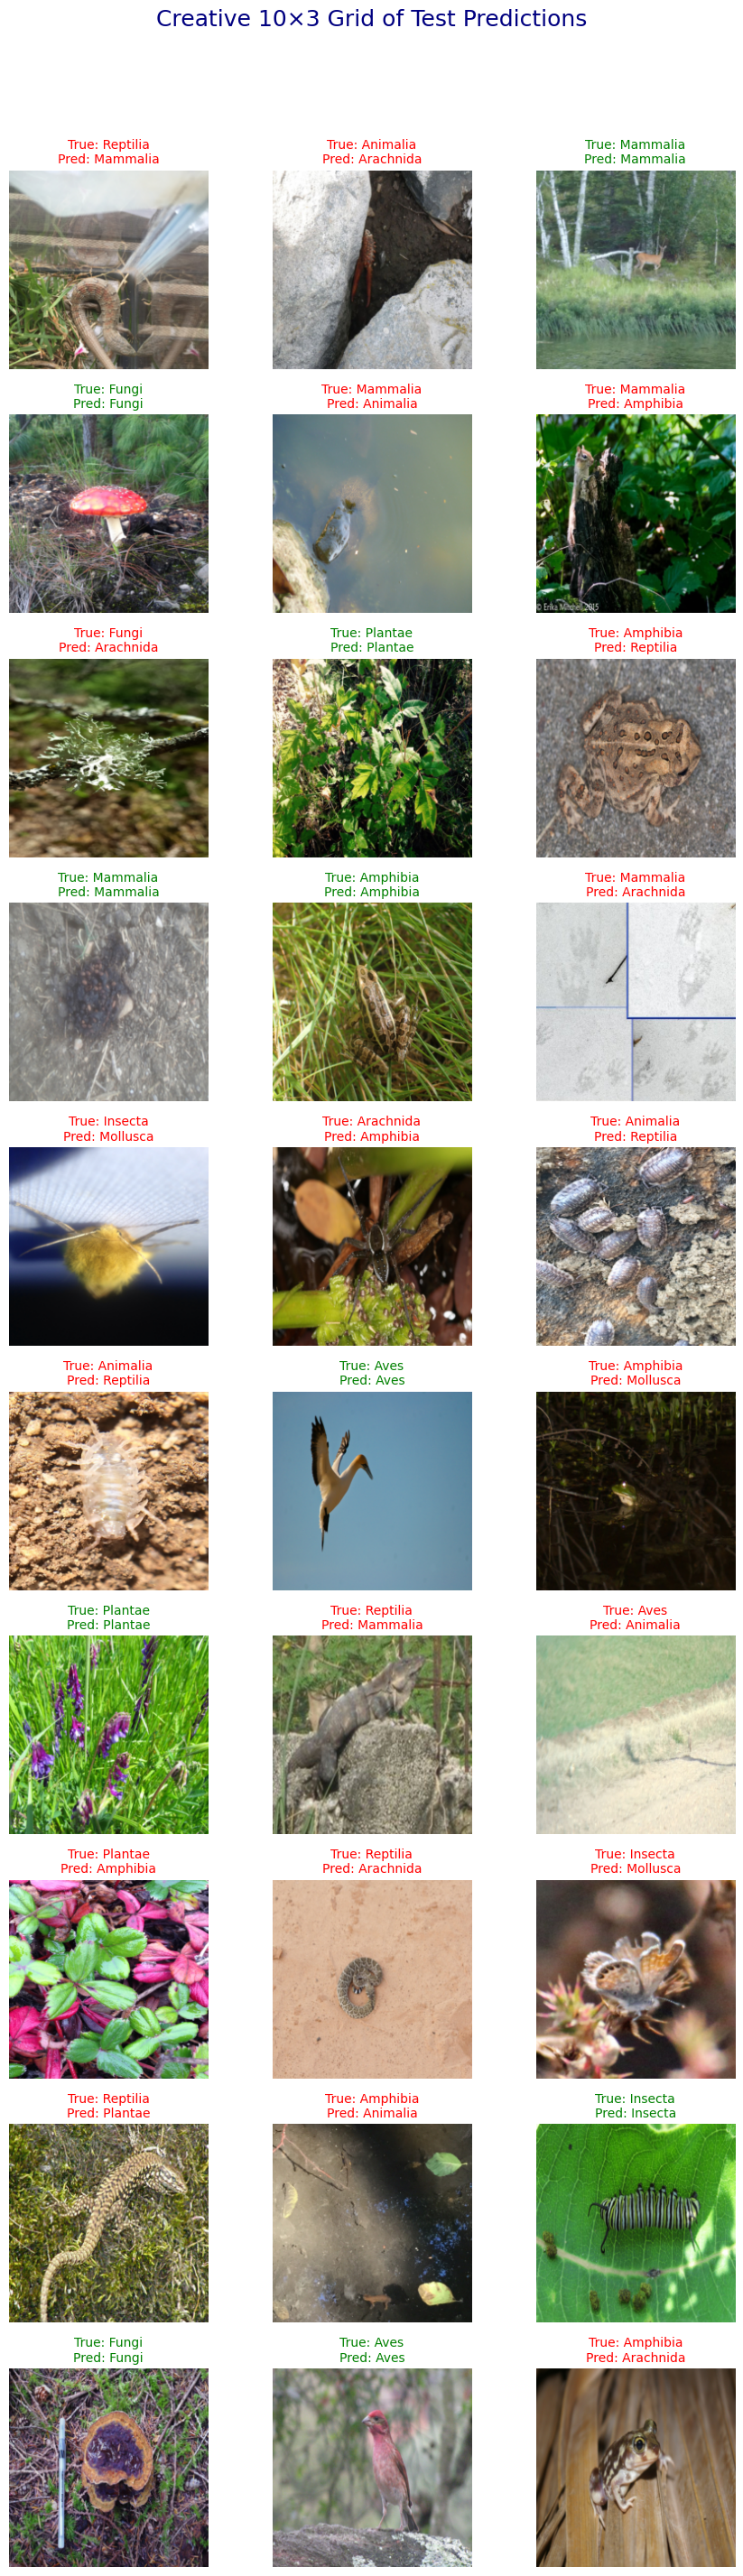

In [4]:
import os
import sys
import torch
import wandb
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

os.environ["CUDA_VISIBLE_DEVICES"] = "3"

# Best hyperparameters provided.
best_hparams = {
    "activation_fn": "mish",
    "batch_norm": True,
    "batch_size": 64,
    "data_augmentation": False,
    "dense_neurons": 256,
    "dropout_rate": 0.3,
    "epochs": 20,
    "filter_organization": "double_each_layer",
    "kernel_size": 3,
    "learning_rate": 0.0001,
    "num_filters": 32,
    "resize_dim": 224
}


# --------------------------
# Function: Plot Predictions Grid (10x3)
# --------------------------
def plot_predictions(model, test_dataset, class_names, device, output_dir, grid_shape=(10, 3)):
    """
    Plots a creative 10×3 grid (or grid_shape rows x cols) of test sample images,
    along with their true labels and predictions. Correct predictions are shown in green,
    incorrect in red. Additional creative elements (such as a grid title and custom layout)
    are added.
    
    :param model: Trained model (in eval mode).
    :param test_dataset: Test dataset (instance of ImageFolder).
    :param class_names: List of class names.
    :param device: Device to run inference on.
    :param output_dir: Directory to save the output figure.
    :param grid_shape: Tuple (rows, cols) for grid arrangement.
    :return: The figure object (matplotlib.figure.Figure)
    """
    model.eval()
    num_samples = grid_shape[0] * grid_shape[1]
    # Randomly sample indices without replacement
    indices = np.random.choice(len(test_dataset), size=num_samples, replace=False)
    samples = [test_dataset[i] for i in indices]

    # Create the figure
    fig, axes = plt.subplots(grid_shape[0], grid_shape[1], figsize=(grid_shape[1] * 3, grid_shape[0] * 3))
    fig.suptitle("Creative 10×3 Grid of Test Predictions", fontsize=18, color="navy")

    with torch.no_grad():
        for ax, (img, true_label) in zip(axes.flatten(), samples):
            input_tensor = img.unsqueeze(0).to(device)
            output = model(input_tensor)
            _, pred_label = torch.max(output, 1)
            pred_label = pred_label.item()

            # Convert image tensor to numpy array for plotting
            np_img = img.cpu().numpy().transpose(1, 2, 0)
            np_img = np.clip(np_img, 0, 1)
            ax.imshow(np_img)
            ax.axis("off")
            # Title with true and predicted labels; green if correct, red if incorrect.
            title_color = "green" if pred_label == true_label else "red"
            ax.set_title(f"True: {class_names[true_label]}\nPred: {class_names[pred_label]}",
                         fontsize=10, color=title_color)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    # Save the figure so that we can log it with wandb
    output_filepath = f"{output_dir}/dummy_partA_Q4_test_predictions_grid.png"
    plt.savefig(output_filepath, dpi=300)
    # Optionally, you can call plt.show() if you want to display the plot interactively.
    plt.show()
    return fig, output_filepath


# --------------------------
# Main training function (using best hyperparameters from Q2)
# --------------------------
def train_and_evaluate_best(static_config):
    """
    This function trains the best model on training data (with validation monitoring),
    then evaluates the final model on test data and displays a creative 10×3 grid of test images.
    Metrics and plots are logged with wandb.
    """
    # Initialize wandb run with the best hyperparameters.
    run = wandb.init(project=static_config['wandb_project'], config=best_hparams)
    run.name = static_config['wandb_run_name']

    device = "cuda" if torch.cuda.is_available() else "cpu"
    set_seeds(42)

    # Determine activation function.
    best_act_fn = get_activation_fn(best_hparams["activation_fn"])

    # Instantiate the model with best hyperparameters.
    model = MyCNNExtended(
        in_channels=3,
        num_filters=best_hparams["num_filters"],
        kernel_size=best_hparams["kernel_size"],
        activation_fn=best_act_fn,
        dense_neurons=best_hparams["dense_neurons"],
        image_height=best_hparams["resize_dim"],
        image_width=best_hparams["resize_dim"],
        filter_organization=best_hparams["filter_organization"],
        batch_norm=best_hparams["batch_norm"],
        dropout_rate=best_hparams["dropout_rate"]
    )

    # Use multiple GPUs if available.
    if torch.cuda.device_count() > 1:
        print(f"Using {torch.cuda.device_count()} GPUs with DataParallel")
        model = nn.DataParallel(model)
    model = model.to(device)

    # Use the training data (with 20% reserved as validation) similar to Q2.
    train_dir = os.path.join(project_root, static_config["data_root"], "train")
    train_dataset, val_dataset, class_names = load_inaturalist_train_val_data(
        data_dir=train_dir,
        val_ratio=0.2,
        seed=42,
        augment=best_hparams["data_augmentation"],
        resize_dim=best_hparams["resize_dim"]
    )

    train_loader = DataLoader(train_dataset, batch_size=best_hparams["batch_size"], shuffle=True, num_workers=4)
    val_loader = DataLoader(val_dataset, batch_size=best_hparams["batch_size"], shuffle=False, num_workers=4)

    optimizer = optim.Adam(model.parameters(), lr=best_hparams["learning_rate"])
    criterion = nn.CrossEntropyLoss()

    # --- EARLY STOPPING & CHECKPOINT SETUP ---
    best_val_acc = float('-inf')
    epochs_no_improve = 0
    max_patience = static_config["patience"]
     
    ckpt_path = os.path.join(project_root, static_config['output_dir'], "dummy_partA_Q4_best_model.pth")
    # ---------------------------------------------

    print("Starting training...")
    # Training loop
    for epoch in range(best_hparams["epochs"]):
        train_loss, train_acc = train_one_epoch(model, train_loader, optimizer, criterion, device)
        val_loss, val_acc = validate_one_epoch(model, val_loader, criterion, device)
        # Log the metrics to wandb.
        wandb.log({
            "PartA_Q4_epoch": epoch + 1,
            "PartA_Q4_train_loss": train_loss,
            "PartA_Q4_train_accuracy": train_acc,
            "PartA_Q4_val_loss": val_loss,
            "PartA_Q4_val_accuracy": val_acc
        })
        print(f"[Epoch {epoch + 1}/{best_hparams['epochs']}] "
              f"train_loss={train_loss:.4f}, train_acc={train_acc:.4f}, "
              f"val_loss={val_loss:.4f}, val_acc={val_acc:.4f}")

        if static_config["perform_early_stopping"]:
            # --- checkpoint if improvement ---
            if val_acc > best_val_acc:
                best_val_acc = val_acc
                epochs_no_improve = 0
                torch.save(model.state_dict(), ckpt_path)
                print(f"Validation accuracy improved to {val_acc:.4f}. Checkpoint saved.")
            else:
                epochs_no_improve += 1
                print(f"No improvement in validation accuracy for {epochs_no_improve} epoch(s).")
                if epochs_no_improve >= max_patience:
                    print(f"Early stopping after {epochs_no_improve} epochs without improvement.")
                    break

    print("Training complete.")
    if static_config["perform_early_stopping"]:
        print(f"Loading the model with best validation accuracy: {best_val_acc:.4f}")
        # load best checkpoint before testing
        model.load_state_dict(torch.load(ckpt_path))

    # --------------------------
    # Evaluate on test data.
    # --------------------------
    test_dir = os.path.join(project_root, static_config["data_root"], "test")
    test_dataset, class_names = load_inaturalist_test_data(test_dir, best_hparams["resize_dim"])
    test_loader = DataLoader(test_dataset, batch_size=best_hparams["batch_size"], shuffle=False, num_workers=4)
    test_accuracy = evaluate_model_on_test_data(model, test_loader, device)
    wandb.log({"PartA_Q4_test_accuracy": test_accuracy})
    print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

    # --------------------------
    # Plot a creative 10x3 grid of predictions on test data and log the plot to wandb.
    # --------------------------
    os.makedirs(os.path.join(project_root, static_config['output_dir']), exist_ok=True)
    # Plot predictions and save the figure.
    fig, plot_path = plot_predictions(model, test_dataset, class_names, device, os.path.join(project_root, static_config['output_dir']), grid_shape=(10, 3))
    wandb.log({"partA_Q4_test_predictions_grid": wandb.Image(plot_path)})

    run.finish()


if __name__ == "__main__":
    config = get_configs(project_root, 'configs.yaml')['part_a_configs']['solution_4_configs']
    train_and_evaluate_best(config)
